In [3]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

import imgaug as ia
from imgaug import augmenters as iaa 
%matplotlib inline
ia.seed(1)

image = imageio.imread("https://upload.wikimedia.org/wikipedia/commons/8/8e/Yellow-headed_caracara_%28Milvago_chimachima%29_on_capybara_%28Hydrochoeris_hydrochaeris%29.JPG")


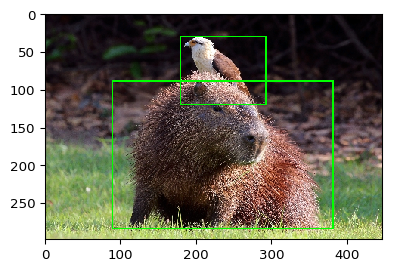

In [7]:
image = ia.imresize_single_image(image, (298, 447))

bbs = ia.BoundingBoxesOnImage([
    ia.BoundingBox(x1=0.2*447, x2=0.85*447, y1=0.3*298, y2=0.95*298),
    ia.BoundingBox(x1=0.4*447, x2=0.65*447, y1=0.1*298, y2=0.4*298)
], shape=image.shape)

ia.imshow(bbs.draw_on_image(image, thickness=2))

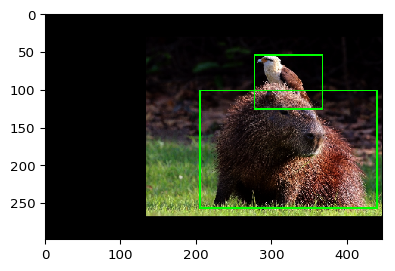

In [37]:
seq = iaa.Sequential([
    iaa.GammaContrast(1.5),
    iaa.Affine(translate_percent={"x": 0.2}, scale=0.8)
])
seq_det = seq.to_deterministic()
image_aug = seq_det.augment_image(image)
bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

ia.imshow(bbs_aug.draw_on_image(image_aug, thickness=2))

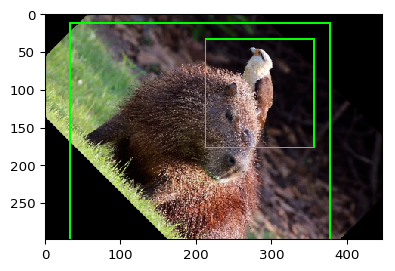

In [49]:
rot = iaa.Affine(rotate=45)  # we skip here the deterministic mode, as 'rotate' is a constant value
image_aug = rot.augment_image(image)
bbs_aug = rot.augment_bounding_boxes([bbs])[0]
ia.imshow(bbs_aug.draw_on_image(image_aug, thickness=2))

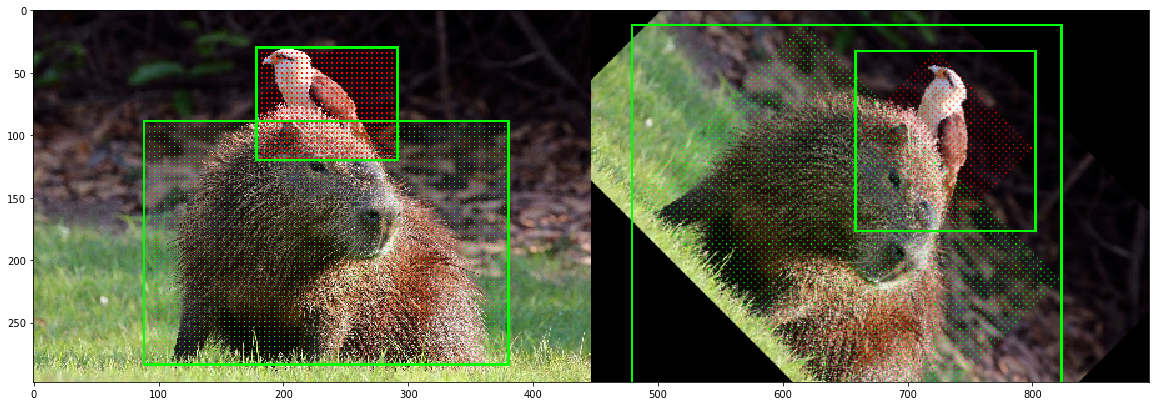

In [71]:
#image_aug = rot.augment_image(image)
bbs_aug = rot.augment_bounding_boxes([bbs])[0]

# highlight the area of each bounding box
image_points = np.copy(image)
image_points[bbs.bounding_boxes[0].y1_int:bbs.bounding_boxes[0].y2_int:4,
             bbs.bounding_boxes[0].x1_int:bbs.bounding_boxes[0].x2_int:4,
             :] = [0, 255, 0]
image_points[bbs.bounding_boxes[1].y1_int:bbs.bounding_boxes[1].y2_int:4,
             bbs.bounding_boxes[1].x1_int:bbs.bounding_boxes[1].x2_int:4,
             :] = [255, 0, 0]

# rotate the image with the highlighted bounding box areas
image_points_aug = rot.augment_image(image_points)

# visualize
side_by_side = np.hstack([
    bbs.draw_on_image(image_points, thickness=2),
    bbs_aug.draw_on_image(image_points_aug, thickness=2)
])
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(side_by_side)

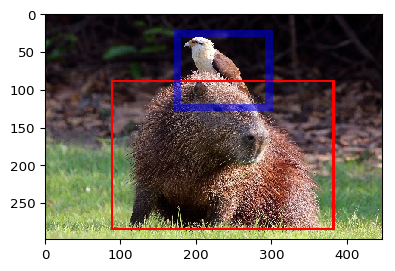

In [73]:
image_bbs = np.copy(image)
image_bbs = bbs.bounding_boxes[0].draw_on_image(image_bbs, color=[255, 0, 0], thickness=3)
image_bbs = bbs.bounding_boxes[1].draw_on_image(image_bbs, color=[0, 0, 255], thickness=10, alpha=0.5)
ia.imshow(image_bbs)

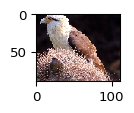

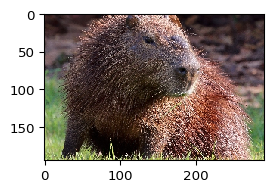

In [75]:
bird = bbs.bounding_boxes[1].extract_from_image(image)
ia.imshow(bird)
bird2 = bbs.bounding_boxes[0].extract_from_image(image)
ia.imshow(bird2)


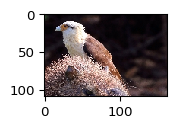

In [84]:
bird = bbs.bounding_boxes[1].extend(all_sides=10, right=30).extract_from_image(image)
ia.imshow(bird)

# Intersection

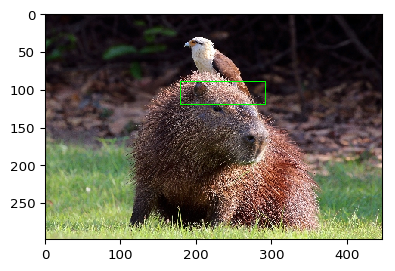

The intersection has a height of 29.8000, width of 111.7500 and an area of 3330.1500


In [85]:
bb_intersection = bbs.bounding_boxes[0].intersection(bbs.bounding_boxes[1])
ia.imshow(bb_intersection.draw_on_image(image))
print("The intersection has a height of %.4f, width of %.4f and an area of %.4f" % (
    bb_intersection.height, bb_intersection.width, bb_intersection.area))

# Union

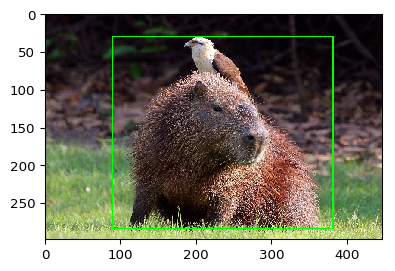

The union has a height of 253.3000, width of 290.5500 and an area of 73596.3150.


In [86]:
bb_union = bbs.bounding_boxes[0].union(bbs.bounding_boxes[1])
ia.imshow(bb_union.draw_on_image(image, thickness=2))
print("The union has a height of %.4f, width of %.4f and an area of %.4f." % (
    bb_union.height, bb_union.width, bb_union.area))

# IOU

IoU:
The IoU of the bounding boxes is: 0.0529.
The IoU of the bounding boxes after shifting one box is: 0.1775.


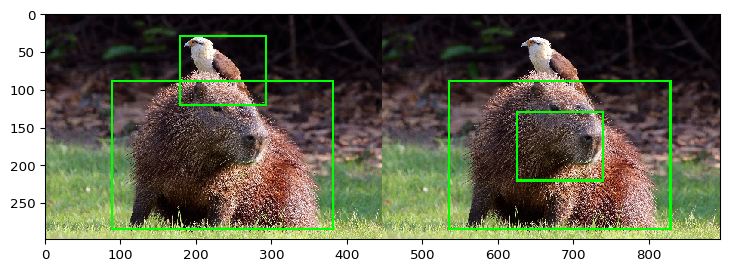

In [87]:
print("IoU:")
iou = bbs.bounding_boxes[0].iou(bbs.bounding_boxes[1])
iou_shifted = bbs.bounding_boxes[0].iou(bbs.bounding_boxes[1].shift(top=100))
                                
print("The IoU of the bounding boxes is: %.4f." % (iou,))
print("The IoU of the bounding boxes after shifting one box is: %.4f." % (iou_shifted,))

bbs_shifted = ia.BoundingBoxesOnImage([
    bbs.bounding_boxes[0],
    bbs.bounding_boxes[1].shift(top=100),
], shape=bbs.shape)
ia.imshow(
    np.hstack([
        bbs.draw_on_image(image, thickness=3),
        bbs_shifted.draw_on_image(image, thickness=3),
    ])
)

BoundingBox with project(from, to):


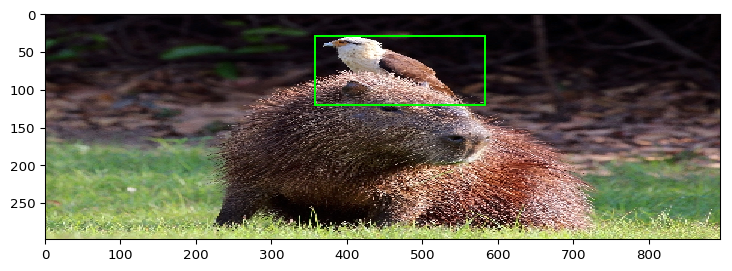

BoundingBoxesOnImage with on(shape):


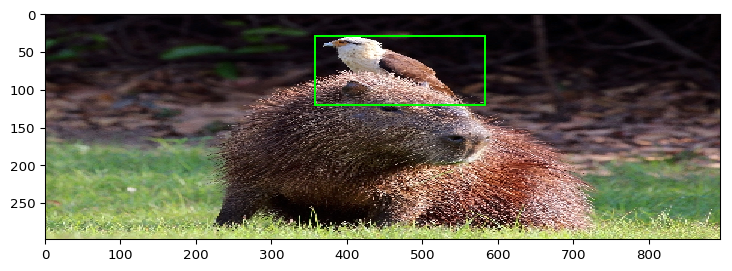

In [90]:
# we limit the example here to the bounding box of the bird
bb_bird = bbs.bounding_boxes[1]
bbsoi_bird = ia.BoundingBoxesOnImage([bbs.bounding_boxes[1]], shape=image.shape)

# lets resize the original image to twice its width
image_larger = ia.imresize_single_image(image, (1.0, 2.0))


# now the change it using project()
print("BoundingBox with project(from, to):")
ia.imshow(bb_bird.project(from_shape=image.shape, to_shape=image_larger.shape)\
                 .draw_on_image(image_larger, thickness=3))

print("BoundingBoxesOnImage with on(shape):")
ia.imshow(bbsoi_bird.on(image_larger.shape).draw_on_image(image_larger, thickness=3))